In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications import ResNet152
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import matplotlib

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'test'
vgg =keras.applications.ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

<IPython.core.display.Javascript object>

In [4]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
# useful for getting number of classes
folders = glob('train/*')
print(folders)
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

['train\\NORMAL', 'train\\PNEUMONIA']
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________________________________________

__________________________________________________________________________________________________
conv4_block9_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block9_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block9_3_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block9_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block9_add (Add)          (None, 14, 14, 1024) 0           conv4_block8_out[0][0]           
                                                                 conv4_block9_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block9_out (Activation)   (None, 14, 14, 1024) 0           conv4_block9_add[0][0]           
__________________________________________________________________________________________________
conv4_bloc

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 5216 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
#  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
#  validation_steps=len(test_set)
)

Epoch 1/50
163/163 [==============================] - 1047s 6s/step - loss: 0.2492 - accuracy: 0.8947
Epoch 2/50
163/163 [==============================] - 1325s 8s/step - loss: 0.2896 - accuracy: 0.8804
Epoch 3/50
163/163 [==============================] - 1337s 8s/step - loss: 0.2790 - accuracy: 0.8882
Epoch 4/50
163/163 [==============================] - 1302s 8s/step - loss: 0.3351 - accuracy: 0.8771
Epoch 5/50
163/163 [==============================] - 1322s 8s/step - loss: 0.2582 - accuracy: 0.8982
Epoch 6/50
163/163 [==============================] - 39144s 240s/step - loss: 0.3293 - accuracy: 0.8854
Epoch 7/50
 11/163 [=>............................] - ETA: 15:32 - loss: 0.2174 - accuracy: 0.9062

In [24]:
import tensorflow as tf

from keras.models import load_model

model.save('model_Resnet152.h5')

(1279, 1618)

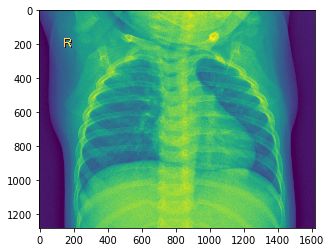

In [12]:
para_cell = train_path+'\\NORMAL'+'\\IM-0122-0001.jpeg'
para_img= plt.imread(para_cell)
plt.imshow(para_img)
para_img.shape

In [13]:
saved_model=tf.keras.models.load_model(    'model_Resnet152.h5')

<IPython.core.display.Javascript object>

In [14]:
saved_model.predict()

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x000001F962626D48>>

In [ ]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [9]:
my_data_dir = 'C:\\Users\\deesaw\\Desktop\\cv_PP\\images'
os.listdir(my_data_dir) 

['test', 'train']

In [10]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'


In [11]:
os.listdir(test_path)


['image_0.jpeg',
 'image_1.jpeg',
 'image_10.jpeg',
 'image_100.jpeg',
 'image_101.jpeg',
 'image_102.jpeg',
 'image_103.jpeg',
 'image_104.jpeg',
 'image_105.jpeg',
 'image_106.jpeg',
 'image_107.jpeg',
 'image_108.jpeg',
 'image_109.jpeg',
 'image_11.jpeg',
 'image_110.jpeg',
 'image_111.jpeg',
 'image_112.jpeg',
 'image_113.jpeg',
 'image_114.jpeg',
 'image_115.jpeg',
 'image_116.jpeg',
 'image_117.jpeg',
 'image_118.jpeg',
 'image_119.jpeg',
 'image_12.jpeg',
 'image_120.jpeg',
 'image_121.jpeg',
 'image_122.jpeg',
 'image_123.jpeg',
 'image_124.jpeg',
 'image_125.jpeg',
 'image_126.jpeg',
 'image_127.jpeg',
 'image_128.jpeg',
 'image_129.jpeg',
 'image_13.jpeg',
 'image_130.jpeg',
 'image_131.jpeg',
 'image_132.jpeg',
 'image_133.jpeg',
 'image_134.jpeg',
 'image_135.jpeg',
 'image_136.jpeg',
 'image_137.jpeg',
 'image_138.jpeg',
 'image_139.jpeg',
 'image_14.jpeg',
 'image_140.jpeg',
 'image_141.jpeg',
 'image_142.jpeg',
 'image_143.jpeg',
 'image_144.jpeg',
 'image_145.jpeg',
 '

In [12]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [13]:
os.listdir(train_path+'\\NORMAL')[0]

'IM-0115-0001.jpeg'

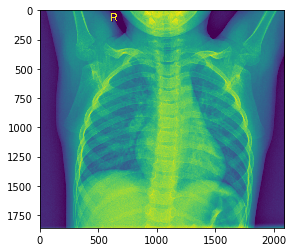

In [18]:
normal = train_path+'\\NORMAL'+'\\IM-0115-0001.jpeg'
normal_img= imread(normal)
plt.imshow(normal_img)

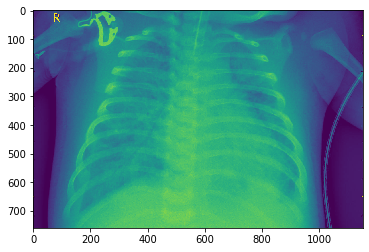

In [19]:
PNEUMONIA_path = train_path+'\\PNEUMONIA\\'+os.listdir(train_path+'\\PNEUMONIA')[0]
PNEUMONIA_cell = imread(PNEUMONIA_path)
plt.imshow(PNEUMONIA_cell)

In [20]:
len(os.listdir(train_path+'\\NORMAL'))

1341

In [21]:
len(os.listdir(train_path+'\\PNEUMONIA'))

3875

In [22]:
PNEUMONIA_cell.shape

(760, 1152)

In [23]:
normal_img.shape

(1858, 2090)

In [25]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'\\NORMAL'):
    
    img = imread(train_path+'\\NORMAL'+'\\'+image_filename)
    d1,d2= img.shape
    dim1.append(d1)
    dim2.append(d2)

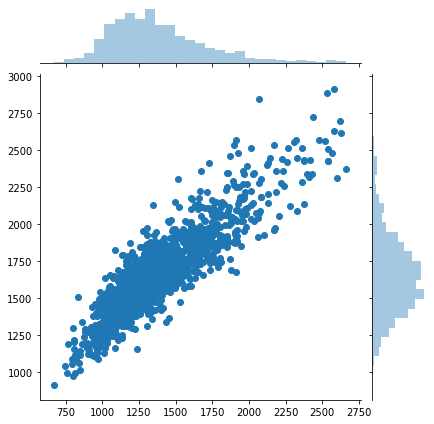

In [26]:
sns.jointplot(dim1,dim2)

In [27]:
np.mean(dim1)

1381.4310216256524

In [28]:
np.mean(dim2)

1667.7345264727815

In [29]:
image_shape = (1300,1600,3)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

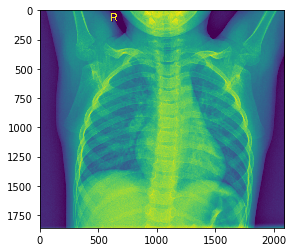

In [32]:
plt.imshow(normal_img)

In [37]:
#plt.imshow(image_gen.random_transform(normal_img))

In [38]:
image_gen.flow_from_directory(train_path)

Found 5216 images belonging to 2 classes.


In [39]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [40]:
IMAGE_SIZE = [1300, 1600]
train_path = 'train'
valid_path = 'test'
resnet =keras.applications.ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
# useful for getting number of classes
folders = glob('train/*')
print(folders)
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

<IPython.core.display.Javascript object>

[]
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1300, 1600,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 1306, 1606, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 650, 800, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 650, 800, 64) 256         conv1_conv[0][0]                 
_________________________________________________________________________________________

conv4_block20_3_conv (Conv2D)   (None, 82, 100, 1024 263168      conv4_block20_2_relu[0][0]       
__________________________________________________________________________________________________
conv4_block20_3_bn (BatchNormal (None, 82, 100, 1024 4096        conv4_block20_3_conv[0][0]       
__________________________________________________________________________________________________
conv4_block20_add (Add)         (None, 82, 100, 1024 0           conv4_block19_out[0][0]          
                                                                 conv4_block20_3_bn[0][0]         
__________________________________________________________________________________________________
conv4_block20_out (Activation)  (None, 82, 100, 1024 0           conv4_block20_add[0][0]          
__________________________________________________________________________________________________
conv4_block21_1_conv (Conv2D)   (None, 82, 100, 256) 262400      conv4_block20_out[0][0]          
__________

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images\\train\\',
                                                 target_size = IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
validation_set = train_datagen.flow_from_directory('images\\validation\\', # same directory as training data
                                                 target_size = IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4564 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [51]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  callbacks=[early_stop]
#  validation_steps=len(test_set)
)

Epoch 1/20


InvalidArgumentError:  Reduction axis -1 is empty in shape [32,0]
	 [[node ArgMax_1 (defined at <ipython-input-51-e8a34a6c49cb>:7) ]] [Op:__inference_train_function_53626]

Function call stack:
train_function


In [ ]:
from tensorflow.keras.models import load_model
model.save('detector.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate_generator(test_image_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

In [ ]:
para_cell

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
my_image = image.img_to_array(my_image)
type(my_image)
my_image.shape
my_image = np.expand_dims(my_image, axis=0)
my_image.shape
model.predict(my_image)
train_image_gen.class_indices

In [47]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [49]:
import warnings
warnings.filterwarnings('ignore')